In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/hotel_bookings.csv')

In [ ]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,NaN,NaN,0.0,Transient,107.0,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,NaN,0.0,Transient,103.0,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,NaN,0.0,Transient,82.0,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,NaN,0.0,Transient,105.5,0.0,0.0,Canceled,2015-04-22


In [ ]:
data.shape

(14684, 32)

In [ ]:
data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14684 non-null  object 
 1   is_canceled                     14684 non-null  int64  
 2   lead_time                       14684 non-null  int64  
 3   arrival_date_year               14684 non-null  int64  
 4   arrival_date_month              14684 non-null  object 
 5   arrival_date_week_number        14684 non-null  int64  
 6   arrival_date_day_of_month       14684 non-null  int64  
 7   stays_in_weekend_nights         14684 non-null  int64  
 8   stays_in_week_nights            14684 non-null  int64  
 9   adults                          14683 non-null  float64
 10  children                        14683 non-null  float64
 11  babies                          14683 non-null  float64
 12  meal                            

In [ ]:
# convert reservation data from object to datetime
data['reservation_status_date '] = pd.to_datetime(data['reservation_status_date'])

In [ ]:
data['reservation_status_date'].dtype

dtype('O')

In [ ]:
data['arrival_date'] = pd.to_datetime(data.arrival_date_year.astype(str) + '-' + data.arrival_date_month.astype(str) + '-' + data.arrival_date_day_of_month.astype(str))

In [ ]:
data['arrival_date']

,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
14679,2017-04-18
14680,2015-12-22
14681,2015-07-22
14682,2015-09-17


In [ ]:
data.drop(columns = ['arrival_date_year' , 'arrival_date_month' , 'arrival_date_day_of_month'] , inplace = True , axis = 1)

In [ ]:
# Check
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'reservation_status_date ', 'arrival_date'],
      dtype='object')

In [ ]:
data.duplicated().sum()

3216

In [ ]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [ ]:
# Handle missing values in columns
for col in data.columns:
  if data[col].isnull().sum() > ( data.shape[0]  * .5) :
    data.drop(columns = col ,inplace = True  , axis = 1 )

    print(data.shape)

(11468, 30)


In [ ]:
# Replace missing values with mean
#data['children'].replace('NaN', data['children'].mean() , inplace= True)
data['children_clear'] = data['children'].fillna(value = data['children'].mean())
data['children_1'] = data['children_clear'].apply(np.floor)

print(data['children_1'].isnull().sum())

9686


In [ ]:
# Drop unwanted rows
data.dropna(subset = ['agent'], inplace  = True)
data.shape

(9686, 30)

In [ ]:
data['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,9562
Non Refund,109
Refundable,15


In [ ]:
data['lead_time'].mean().round()


113.0

In [ ]:
data['total_of_special_requests'].value_counts()
# save twin bed or high floor fo needed

,count
total_of_special_requests,
0.0,5076
1.0,3024
2.0,1351
3.0,219
4.0,16


In [ ]:
range = ['meal','country', 'market_segment']

for x in range:
  data[x].fillna(method='bfill', inplace = True)

  print(data[x].isnull().sum())

0
0
0


<ipython-input-56-82deb98b5a2b>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[x].fillna(method='bfill', inplace = True)


<ipython-input-64-79ca50d4e655>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'market_segment' ,  data = data , palette='rocket')


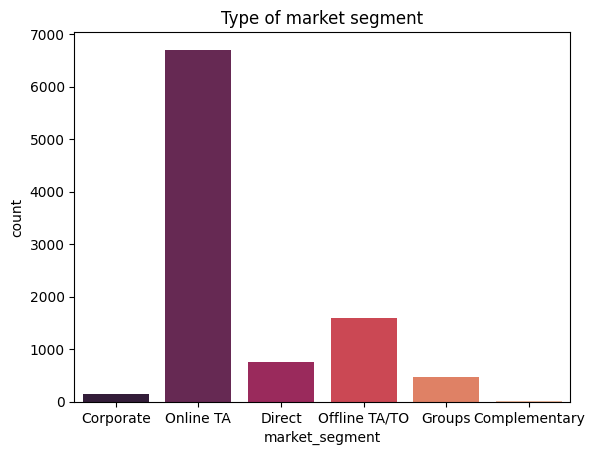

In [ ]:
sns.countplot( x = 'market_segment' ,  data = data , palette='rocket')
plt.title('Type of market segment')
plt.show()

<ipython-input-65-58bc818be55b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'is_canceled', data = data , palette= 'rocket')


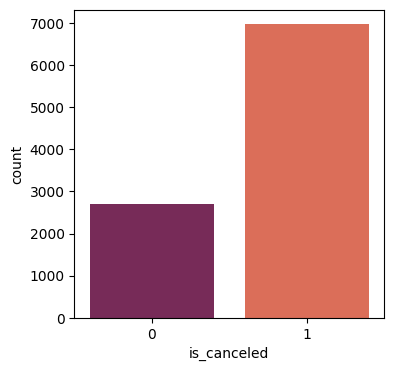

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = 'is_canceled', data = data , palette= 'rocket')
plt.show()

In [ ]:
x = data.drop(columns= 'is_canceled')
y = data['is_canceled']

In [ ]:
x

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reservation_status_date_2017-08-19,reservation_status_date_2017-08-20,reservation_status_date_2017-08-21,reservation_status_date_2017-08-22,reservation_status_date_2017-08-23,reservation_status_date_2017-08-25,reservation_status_date_2017-08-26,reservation_status_date_2017-08-27,reservation_status_date_2017-08-28,reservation_status_date_2017-08-29
3,13,27,0,1,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,27,0,2,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9,27,0,2,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,85,27,0,3,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,75,27,0,3,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14661,5,21,1,0,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14662,0,2,0,1,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14663,255,38,8,20,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14680,399,52,0,1,2.0,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,is_canceled
3,0
4,0
7,0
8,1
9,1
...,...
14661,0
14662,0
14663,0
14680,1


In [ ]:
# Convert categorical values into numerical
x = pd.get_dummies(x , dtype =float , drop_first = True)
x.head(5)

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reservation_status_date_2017-08-19,reservation_status_date_2017-08-20,reservation_status_date_2017-08-21,reservation_status_date_2017-08-22,reservation_status_date_2017-08-23,reservation_status_date_2017-08-25,reservation_status_date_2017-08-26,reservation_status_date_2017-08-27,reservation_status_date_2017-08-28,reservation_status_date_2017-08-29
3,13,27,0,1,1.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,27,0,2,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9,27,0,2,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,85,27,0,3,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,75,27,0,3,2.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
